In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/Data')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/drive/MyDrive/Data"))
file_count = len(files)
#print(file_count)

['Bengin cases', 'Malignant cases']


In [5]:
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/Data'
base_dir = '/content/drive/MyDrive/Split_data_inception_V3/'
os.mkdir(base_dir)

In [6]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [7]:
#Under train folder create two folders 

train_cloud_dir = os.path.join(train_dir, 'Bengin cases')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'Malignant cases')
os.mkdir(train_foggy_dir)

In [8]:
#Under validation folder create five folders 

validation_cloud_dir = os.path.join(validation_dir, 'Bengin cases')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'Malignant cases')
os.mkdir(validation_foggy_dir)

In [9]:
import os
import random
from shutil import copyfile

In [10]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [11]:
BENGIN_SOURCE_DIR = '/content/drive/MyDrive/Data/Bengin cases/'
TRAINING_BENGIN_DIR = '/content/drive/MyDrive/Split_data_inception_V3/train/Bengin cases/'
VALID_BENGIN_DIR = '/content/drive/MyDrive/Split_data_inception_V3/validation/Bengin cases/'

MALIGNANT_SOURCE_DIR = '/content/drive/MyDrive/Data/Malignant cases/'
TRAINING_MALIGNANT_DIR = '/content/drive/MyDrive/Split_data_inception_V3/train/Malignant cases/'
VALID_MALIGNANT_DIR = '/content/drive/MyDrive/Split_data_inception_V3/validation/Malignant cases/'

In [12]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(BENGIN_SOURCE_DIR, TRAINING_BENGIN_DIR, VALID_BENGIN_DIR, split_size)
split_data(MALIGNANT_SOURCE_DIR, TRAINING_MALIGNANT_DIR, VALID_MALIGNANT_DIR, split_size)

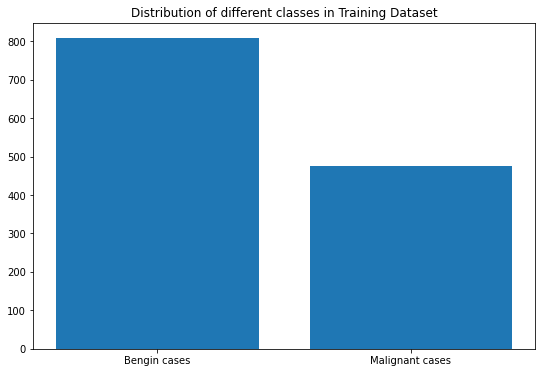

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Bengin cases', 'Malignant cases']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Split_data_inception_V3/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [14]:
for i in ['Bengin cases', 'Malignant cases']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Split_data_inception_V3/train/'+i+'/'))))

Training Bengin cases images are: 808
Training Malignant cases images are: 476


In [15]:
for i in ['Bengin cases', 'Malignant cases']:
    print('Testing {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Split_data_inception_V3/validation/'+i+'/'))))

Testing Bengin cases images are: 143
Testing Malignant cases images are: 85


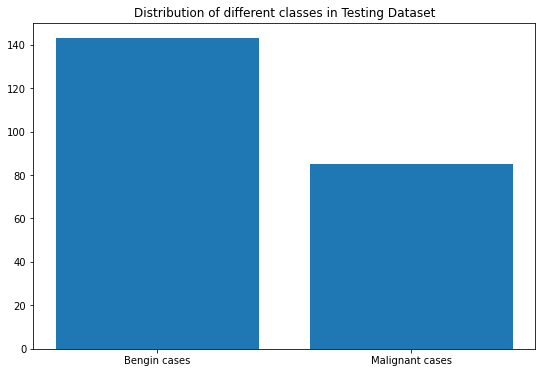

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Bengin cases', 'Malignant cases']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Split_data_inception_V3/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Testing Dataset')
plt.show()

In [ ]:
!pip install tensorflow==2.7.0

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import sequential
from tensorflow.keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=8,
                                   zoom_range=0.15,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.10,
                                   horizontal_flip=True,
                                   brightness_range=[0.8,1.2],
                                   channel_shift_range=0.15,
                                   fill_mode="nearest")

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/Split_data_inception_V3/train',target_size=(299,299),batch_size=32,class_mode='binary')

x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/Split_data_inception_V3/validation',target_size=(299,299),batch_size=32,class_mode='binary')

print(x_train.class_indices)
print(x_test.class_indices)

Found 1284 images belonging to 2 classes.
Found 228 images belonging to 2 classes.
{'Bengin cases': 0, 'Malignant cases': 1}
{'Bengin cases': 0, 'Malignant cases': 1}


In [47]:
import tensorflow.python.keras.applications

In [48]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [49]:
base_model=tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(299,299,3),
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
for layer in base_model.layers:
    layer.trainable=False

In [50]:
x=layers.Flatten()(base_model.output)
x=layers.Dense(512,activation='relu')(x)

x=layers.Dropout(0.5)(x)
x=layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.models.Model(base_model.input,x)



In [51]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [52]:
TRAIN_COUNT =len(x_train.filepaths)
TEST_COUNT=len(x_test.filepaths)
TRAIN_STEPS_PER_EPOCH= round(TRAIN_COUNT/32)
VAL_STEPS_PER_EPOCH = round(TEST_COUNT/32)

In [53]:
print(f"TRAIN_STEPS_PER_EPOCH:{TRAIN_STEPS_PER_EPOCH}")
print(f"VAL_STEPS_PER_EPOCH:{VAL_STEPS_PER_EPOCH}")

TRAIN_STEPS_PER_EPOCH:40
VAL_STEPS_PER_EPOCH:7


In [54]:
from tensorflow.python.keras.callbacks import EarlyStopping,ModelCheckpoint
EARLY_STOP_PATIENCE =5

In [55]:
cb_early_stopper =EarlyStopping(monitor='val_losss',patience=EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath='Inception_v3.hdf5',monitor='val_loss',save_best_only=True,mode='auto')
callbacks=[cb_checkpointer,cb_early_stopper]
history=model.fit_generator(x_train,steps_per_epoch=TRAIN_STEPS_PER_EPOCH,epochs=20,
                            validation_data=x_test,validation_steps=VAL_STEPS_PER_EPOCH)

Epoch 1/20
40/40 [==============================] - 369s 9s/step - loss: 7.7058 - accuracy: 0.8387 - val_loss: 0.2296 - val_accuracy: 0.9911
Epoch 2/20
40/40 [==============================] - 389s 10s/step - loss: 1.2091 - accuracy: 0.9529 - val_loss: 0.0381 - val_accuracy: 0.9955
Epoch 3/20
40/40 [==============================] - 382s 10s/step - loss: 0.7911 - accuracy: 0.9696 - val_loss: 0.0354 - val_accuracy: 0.9911
Epoch 4/20
40/40 [==============================] - 399s 10s/step - loss: 0.5694 - accuracy: 0.9696 - val_loss: 0.0363 - val_accuracy: 0.9955
Epoch 5/20
40/40 [==============================] - 379s 9s/step - loss: 0.7357 - accuracy: 0.9585 - val_loss: 1.1069e-05 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 385s 10s/step - loss: 0.3009 - accuracy: 0.9768 - val_loss: 0.0154 - val_accuracy: 0.9911
Epoch 7/20
40/40 [==============================] - 374s 9s/step - loss: 0.2785 - accuracy: 0.9736 - val_loss: 1.9943e-04 - val_accuracy: 1.0000
E

In [56]:
model.save("Inception_v3.hdf5")

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix


[[88 55]
 [55 30]]
0.5175438596491229


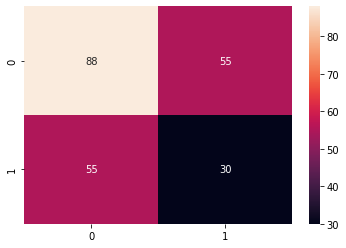

In [58]:
y_pred=model.predict(x_test)
threshold=0.5
y_pred_threshold=[(1 if val>threshold else 0) for val in y_pred]
y_true=x_test.labels.tolist()
print(confusion_matrix(y_true,y_pred_threshold))
print(accuracy_score(y_true,y_pred_threshold))
sns.heatmap(confusion_matrix(y_true,y_pred_threshold),annot=True)


In [59]:
y_pred = model.predict(x_test, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
#y_true=x_test.labels.tolist()



print(classification_report(y_true, y_pred_bool))

print(confusion_matrix(y_true, y_pred=y_pred_bool))

8/8 [==============================] - 49s 6s/step
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       143
           1       0.00      0.00      0.00        85

    accuracy                           0.63       228
   macro avg       0.31      0.50      0.39       228
weighted avg       0.39      0.63      0.48       228

[[143   0]
 [ 85   0]]


In [ ]:
print(classification_report(y_true, y_pred_bool))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       143
           1       0.00      0.00      0.00        85

    accuracy                           0.63       228
   macro avg       0.31      0.50      0.39       228
weighted avg       0.39      0.63      0.48       228



In [60]:
keys=history.history.keys()
print(keys)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


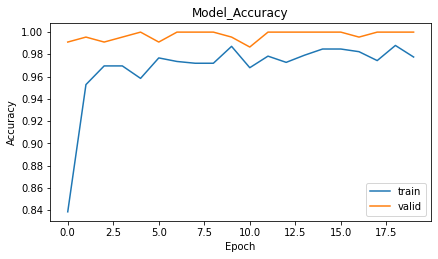

In [61]:
plt.figure(1,figsize=(15,8))
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','valid'])

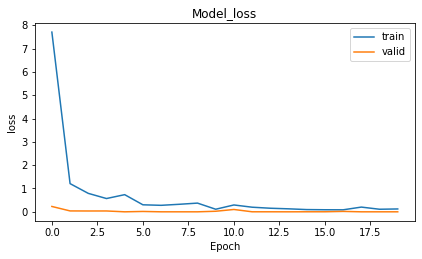

In [62]:
plt.figure(1,figsize=(15,8))
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'])

plt.show()

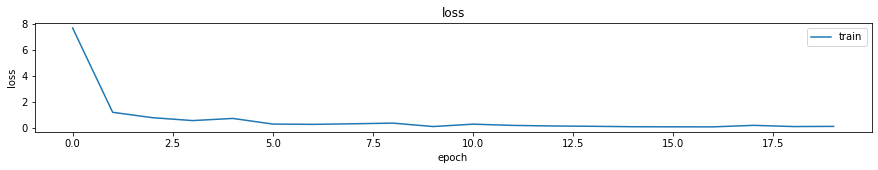

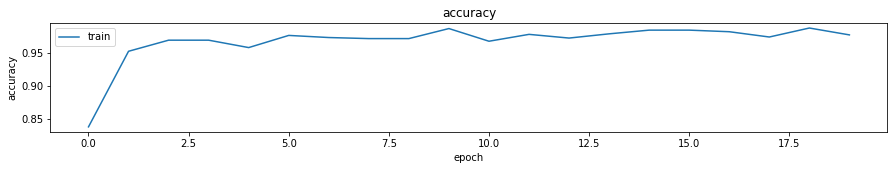

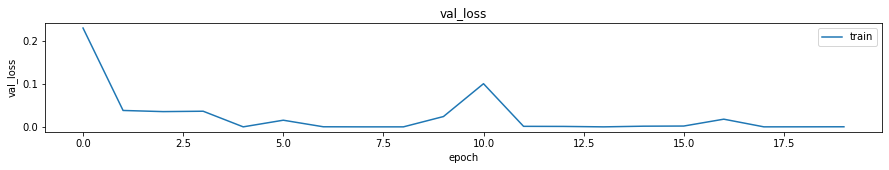

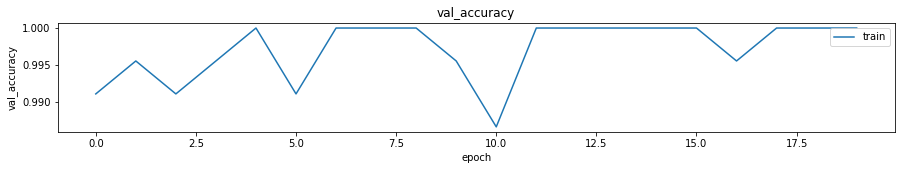

In [63]:
for key in keys:
  plt.figure(figsize=(15,2))
  plt.plot(history.history[key])
  plt.title(key)
  plt.ylabel(key)
  plt.xlabel('epoch')
  plt.legend(['train','valid'])

plt.show()

In [64]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
model=load_model('/content/Inception_v3.hdf5')

In [65]:
from keras.preprocessing import image
import cv2
import numpy as np
import PIL
from PIL import Image

In [76]:
img = image.load_img('/content/drive/MyDrive/Split_data_inception_V3/validation/Malignant cases/Malignant case (207).jpg',target_size=(299,299))

In [77]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x.shape

(1, 299, 299, 3)

In [78]:
pred = model.predict(x)
pred

array([[1.]], dtype=float32)

In [79]:
class_names=["Bengin cases","Malignant cases"]
prediction = class_names[int(pred[0][0])]
print(pred[0][0])
print(prediction)

1.0
Malignant cases
